In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Fraud/online-payments.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
df = df.drop(["nameOrig", "nameDest"], axis = 1)
#Changing type column to true/false
df = pd.get_dummies(df, columns = ["type"], drop_first=True)
print(df.isnull().sum())
df

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
type_CASH_OUT     0
type_DEBIT        0
type_PAYMENT      0
type_TRANSFER     0
dtype: int64


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,False,False,True,False
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,False,False,True,False
2,1,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,True
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,True,False,False,False
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,True,False,False,False
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,False,False,False,True
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,True,False,False,False
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,False,False,False,True


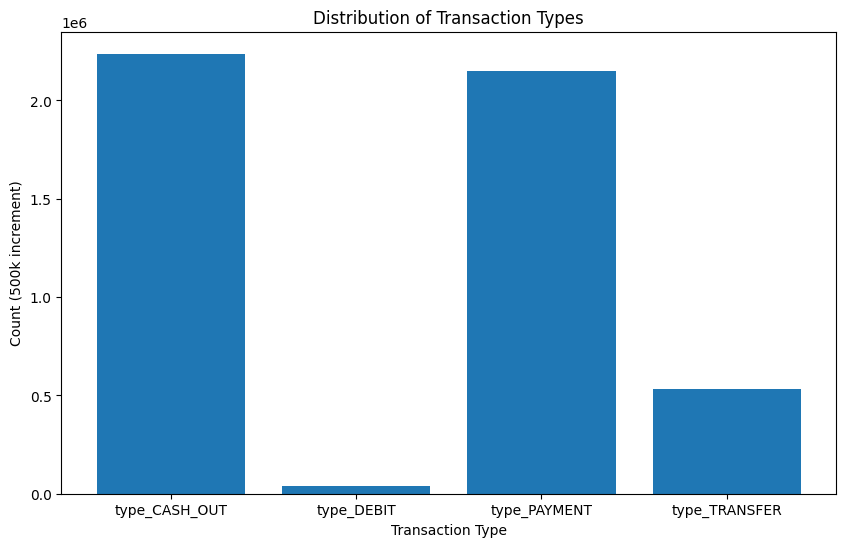


Most common transaction types:
type_CASH_OUT    2237500
type_PAYMENT     2151495
type_TRANSFER     532909
type_DEBIT         41432
dtype: int64


In [ ]:
# Data visualization for Transaction Type
import matplotlib.pyplot as plt


# Get counts for each transaction type column
type_counts = df[["type_CASH_OUT", "type_DEBIT", "type_PAYMENT", "type_TRANSFER"]].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(type_counts.index, type_counts.values)
plt.xlabel("Transaction Type")
plt.ylabel("Count (500k increment)")
plt.title("Distribution of Transaction Types")

plt.show()

print("\nMost common transaction types:")
print(type_counts.sort_values(ascending=False))

Fraudulent Transactions: 
isFraud
0    6354407
1       8213
Name: count, dtype: int64


Text(0.5, 1.0, 'Before Balancing')

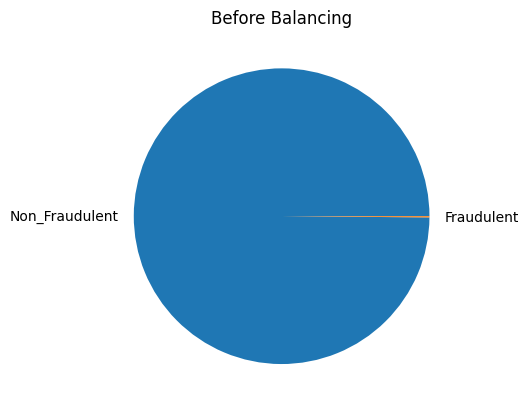

In [ ]:
import matplotlib.pyplot as plt
fraud_counts = df['isFraud'].value_counts()
print("Fraudulent Transactions: ")
print(fraud_counts)

# TASK: Make pie chart (Fraudulent Transacations (Before Balancing))
plt.pie(fraud_counts,labels=("Non_Fraudulent","Fraudulent"))
plt.title("Before Balancing")





After SMOTE:
isFraud
0    4448056
1    4448056
Name: count, dtype: int64


Text(0.5, 1.0, 'After Balancing')

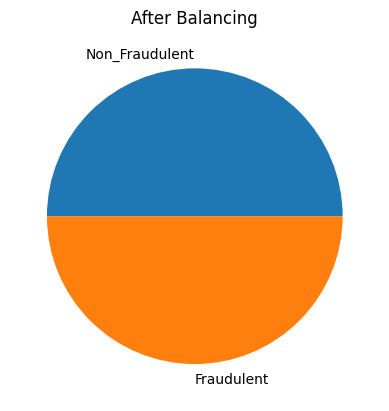

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

x = df.drop("isFraud", axis = 1)
y = df["isFraud"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=x.columns)
y_train_resampled_df = pd.Series(y_train_resampled, name="isFraud")

print("\nAfter SMOTE:")
print(y_train_resampled_df.value_counts())
plt.pie(y_train_resampled_df.value_counts(),labels=("Non_Fraudulent","Fraudulent"))
plt.title("After Balancing")


In [ ]:
# Checking patterns for flagged as fraud
df["isFraud"].value_counts()
result = df.query('isFraud == 0')
result

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.00,0.00,0,0,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.00,0.00,0,0,False,False,True,False
4,1,11668.14,41554.0,29885.86,0.00,0.00,0,0,False,False,True,False
5,1,7817.71,53860.0,46042.29,0.00,0.00,0,0,False,False,True,False
6,1,7107.77,183195.0,176087.23,0.00,0.00,0,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6362319,718,8634.29,518802.0,510167.71,0.00,0.00,0,0,False,False,True,False
6362320,718,159188.22,3859.0,0.00,0.00,159188.22,0,0,True,False,False,False
6362321,718,186273.84,168046.0,0.00,24893.67,211167.51,0,0,True,False,False,False
6362322,718,82096.45,13492.0,0.00,0.00,82096.45,0,0,False,False,False,True


In [ ]:
# TASK: Create Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_resampled = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)
model_resampled.fit(X_train_resampled, y_train_resampled)

y_pred_resampled = model_resampled.predict(X_test)

print("\nClassification Report (Resampled Data):")
print(classification_report(y_test, y_pred_resampled))

print("\nConfusion Matrix (Resampled Data):")
print(confusion_matrix(y_test, y_pred_resampled))

print("\nAccuracy Score (Resampled Data):")
print(accuracy_score(y_test, y_pred_resampled))


Classification Report (Resampled Data):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1906351
           1       0.07      0.99      0.13      2435

    accuracy                           0.98   1908786
   macro avg       0.53      0.99      0.56   1908786
weighted avg       1.00      0.98      0.99   1908786


Confusion Matrix (Resampled Data):
[[1873520   32831]
 [     17    2418]]

Accuracy Score (Resampled Data):
0.9827911562637195
